In [100]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.color_palette("viridis") 
sns.set_palette("viridis")
plt.rcParams['figure.dpi'] = 150  # Resolución en pantalla
plt.rcParams['savefig.dpi'] = 300 # Resolución al guardar archivos

In [101]:
def generate_pro_series_v2_1(n_points=1000):
    np.random.seed(42)
    time = np.arange(n_points)
    dates = pd.date_range(start='2020-01-01', periods=n_points, freq='D')
    
    # Base, Tendencia y Estacionalidad
    y = 50 + (0.002 * time**1.6) + (7 * np.sin(2 * np.pi * time / 7)) + (12 * np.sin(2 * np.pi * time / 30.5))
    
    # Memoria AR(1) y Ruido Heterocedástico
    ar = np.zeros(n_points)
    for t in range(1, n_points):
        ar[t] = 0.7 * ar[t-1] + np.random.normal(0, 1)
    
    noise = np.random.normal(0, 1 + 0.005 * time, n_points)
    y += ar + noise + np.where(time > 700, 30, 0) # Quiebre estructural
    y = np.maximum(y, 1.0) 
    
    df = pd.DataFrame({'value': y}, index=dates)
    
    # OUTLIERS SUTILES (1.5x en lugar de 2.5x)
    outlier_idx = np.random.choice(n_points, size=15, replace=False)
    df.iloc[outlier_idx, 0] = df.iloc[outlier_idx, 0] * 1.5 
    
    # NULOS AL 5%
    nan_idx = np.random.choice(n_points, size=int(n_points * 0.05), replace=False)
    df.iloc[nan_idx, 0] = np.nan
    
    return df

df = generate_pro_series_v2_1()

In [103]:
df.isna().sum()

value    50
dtype: int64

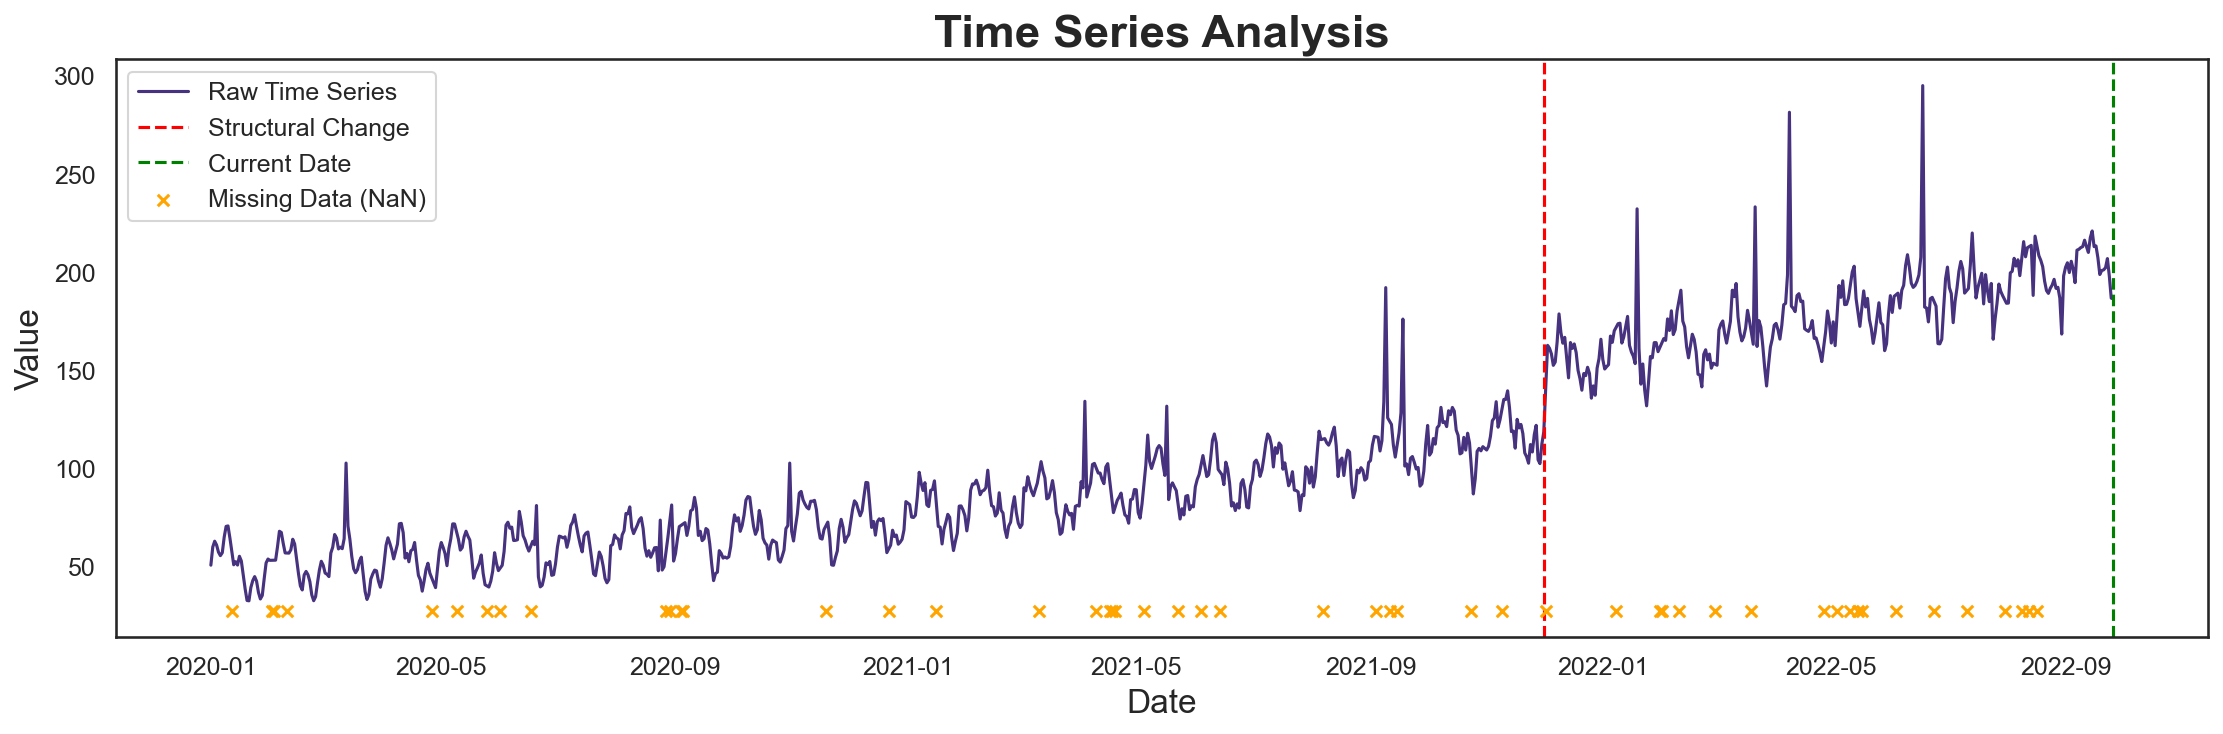

In [122]:
plt.figure(figsize=(18,5))
sns.lineplot(data = df, x = df.index, y = 'value', linewidth = 1.5, label='Raw Time Series') 
plt.xlabel('Date',fontsize=16)
plt.ylabel('Value',fontsize=16)
plt.title('Time Series Analysis',fontsize=22, fontweight = 'bold')
plt.axvline(df.index[700], color='red', linestyle='--', label='Structural Change')
plt.axvline(df.index[df.shape[0]-1], color='green', linestyle='--', label='Current Date')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12) 

nulos = df[df['value'].isna()]
y_base = df['value'].min() - 5
plt.scatter(nulos.index, [y_base] * len(nulos), 
            color='orange', 
            marker='x', 
            s=30, 
            label='Missing Data (NaN)',
            zorder=5)

plt.legend(fontsize=12)



plt.savefig('time_series_plot_v2.png')
plt.show()

In [106]:
nulos_reales = df[df['value'].isna()]
nulos_reales

,value
2020-01-12,NaN
2020-02-02,NaN
2020-02-03,NaN
2020-02-10,NaN
2020-04-26,NaN
2020-05-09,NaN
2020-05-25,NaN
2020-06-01,NaN
2020-06-17,NaN
2020-08-27,NaN
